# Correctness and response time

### Is there a statistically significant correlation between the correctness of the answer and the response time?

In [17]:
import pandas as pd

from functions.tests.correlations import correlation_independent_groups_test
from functions.plots import plot_multi_boxplot, plot_multi_density, plot_multi_scatter

In [18]:
df_answers = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/correctness.csv')

df_time = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/times.csv')

df_merge = df_answers.merge(df_time, on='ID')
df_merge.head()

,ID,1a_trud,1b_trud,2a_trud,2b_trud,3a_trud,3b_trud,Trud_all,Corr_all,1a_corr,...,Duration_2a,Duration_2b,Duration_3a,Duration_3b,SumTime_all,SumTime_a,SumTime_b,SumTime_1,SumTime_2,SumTime_3
0,1,3,1,4,3,4,4,19,4,1,...,54.481,58.697,56.314,63.897,276.921,138.810,138.110,43.531,113.178,120.211
1,2,1,2,3,1,2,4,13,5,1,...,42.248,85.329,47.948,129.427,459.647,156.426,303.219,154.693,127.577,177.375
2,3,2,1,3,1,1,1,9,4,1,...,45.165,32.732,8.000,61.197,299.890,121.995,177.892,152.793,77.897,69.197
3,4,3,2,2,1,3,5,16,5,1,...,12.449,37.715,60.980,101.795,337.437,119.477,217.956,124.494,50.164,162.775
4,5,4,2,3,2,3,3,17,6,1,...,55.931,22.132,34.898,62.930,271.458,158.809,112.644,95.562,78.063,97.828


In [19]:
df_time.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,40.0,19.500000,11.690452,0.000,9.75000,19.5000,29.25000,39.000
ID,40.0,24.600000,13.343201,1.000,14.75000,24.5000,35.50000,46.000
Duration_1a,40.0,52.403675,18.085029,28.015,39.71450,52.7055,62.95550,117.478
Duration_1b,40.0,50.364550,24.844454,15.516,30.48150,44.7810,66.25500,112.511
Duration_2a,40.0,34.225000,23.195850,8.416,15.74500,27.2320,45.29400,98.295
Duration_2b,40.0,55.594400,28.714159,12.066,33.34400,53.2055,71.83000,121.461
Duration_3a,40.0,42.925775,22.404602,8.000,22.59475,39.8560,57.47650,100.562
Duration_3b,40.0,80.122275,35.611748,18.282,56.52650,73.5710,105.42800,144.209
SumTime_all,40.0,315.660275,93.454842,155.010,246.92700,292.4720,387.47275,497.887
SumTime_a,40.0,129.554450,39.260117,48.881,99.67775,121.1280,151.46325,216.222


##### H0: There is no statistically significant correlation between the correctness of the answer and the response time.

##### H1: There is a statistically significant correlation between the correctness of the answer and the response time.

##### Significance level: $\alpha=0.05$

In [20]:
ALPHA = 0.05

Sum of correctness and time for all graphics

In [21]:
correlation_independent_groups_test(df_merge['SumTime_all'], df_merge['Corr_all'], ALPHA)

Conducting normality test...
Conducting Spearman correlation test...
Spearman correlation test statistic value: -0.0003861088760879186
P-value: 0.99811338020953
No reason to reject H0, accept H0.


'P-value: 1.00'

Sum of correctness and time for graphics A and B

In [22]:
correlation_independent_groups_test(df_merge['SumTime_a'], df_merge['SumCorr_a'], ALPHA)
print('------------------------------')
correlation_independent_groups_test(df_merge['SumTime_b'], df_merge['SumCorr_b'], ALPHA)

Conducting normality test...
Conducting Spearman correlation test...
Spearman correlation test statistic value: -0.2538076321657207
P-value: 0.11403353352833252
No reason to reject H0, accept H0.
------------------------------
Conducting normality test...
Conducting Spearman correlation test...
Spearman correlation test statistic value: 0.17067801855335882
P-value: 0.29234853727765525
No reason to reject H0, accept H0.


'P-value: 0.29'

Sum of correctness and time for graphics 1, 2, 3

In [23]:
correlation_independent_groups_test(df_merge['SumTime_1'], df_merge['SumCorr_1'], ALPHA)
print('------------------------------')
correlation_independent_groups_test(df_merge['SumTime_2'], df_merge['SumCorr_2'], ALPHA)
print('------------------------------')
correlation_independent_groups_test(df_merge['SumTime_3'], df_merge['SumCorr_3'], ALPHA)

Conducting normality test...
Conducting Spearman correlation test...
Spearman correlation test statistic value: -0.015723566468230525
P-value: 0.9232846697547721
No reason to reject H0, accept H0.
------------------------------
Conducting normality test...
Conducting Spearman correlation test...
Spearman correlation test statistic value: -0.5056360294375346
P-value: 0.0008739780375695082
There are grounds to reject H0, accept H1.
------------------------------
Conducting normality test...
Conducting Spearman correlation test...
Spearman correlation test statistic value: 0.41380190914555703
P-value: 0.0079479797984621
There are grounds to reject H0, accept H1.


'P-value: 0.01'

#### Analysis of individual graphics: 1a, 1b, 2a, 2b, 3a, 3b

In [24]:
df1a = pd.DataFrame({'time': df_merge['Duration_1a'], 'correctness': df_merge['1a_corr']})
df2a = pd.DataFrame({'time': df_merge['Duration_2a'], 'correctness': df_merge['2a_corr']})
df3a = pd.DataFrame({'time': df_merge['Duration_3a'], 'correctness': df_merge['3a_corr']})

df1b = pd.DataFrame({'time': df_merge['Duration_1b'], 'correctness': df_merge['1b_corr']})
df2b = pd.DataFrame({'time': df_merge['Duration_2b'], 'correctness': df_merge['2b_corr']})
df3b = pd.DataFrame({'time': df_merge['Duration_3b'], 'correctness': df_merge['3b_corr']})

dfs = [df1a, df1b, df2a, df2b, df3a, df3b]
names = {
    1: '1a:',
    2: '1b:',
    3: '2a:',
    4: '2b:',
    5: '3a:',
    6: '3b:',
}

In [25]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i+1])
    correlation_independent_groups_test(df['time'], df['correctness'], ALPHA)

-------------------------------------
1a:
Conducting normality test...
Conducting Spearman correlation test...
Spearman correlation test statistic value: 0.10805162707788583
P-value: 0.5069106346488899
No reason to reject H0, accept H0.
-------------------------------------
1b:
Conducting normality test...
Conducting Spearman correlation test...
Spearman correlation test statistic value: 0.012333778956249198
P-value: 0.9397891329132312
No reason to reject H0, accept H0.
-------------------------------------
2a:
Conducting normality test...
Conducting Spearman correlation test...
Spearman correlation test statistic value: -0.6474665249418058
P-value: 6.314306617736327e-06
There are grounds to reject H0, accept H1.
-------------------------------------
2b:
Conducting normality test...
Conducting Spearman correlation test...
Spearman correlation test statistic value: -0.20128858473306305
P-value: 0.2129527272662666
No reason to reject H0, accept H0.
-------------------------------------
3

### Summary:

There is a statistically significant correlation between the correctness of the answer and the response time at the level of significance $\alpha=0.05$ for:

- sum of graphics 2 (with the increase in time, the probability of giving a correct answer decreased)
- sum of graphics 3
- graphic 2a (with the increase in time, the probability of giving a correct answer decreased)
- graphic 3a
- graphic 3b (with the increase in time, the probability of giving a correct answer increased)

Confirmation of observations: graphics 2 were simple and some participants were looking for a 'hook', and graphics 3 were difficult and the longer the participant thought about this question, the greater the chance that they would correctly understand the task

### Plots

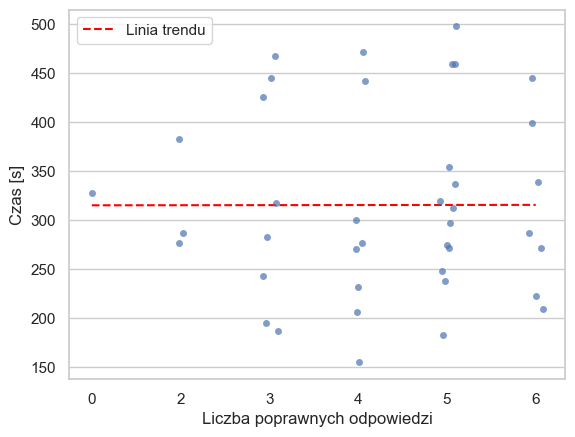

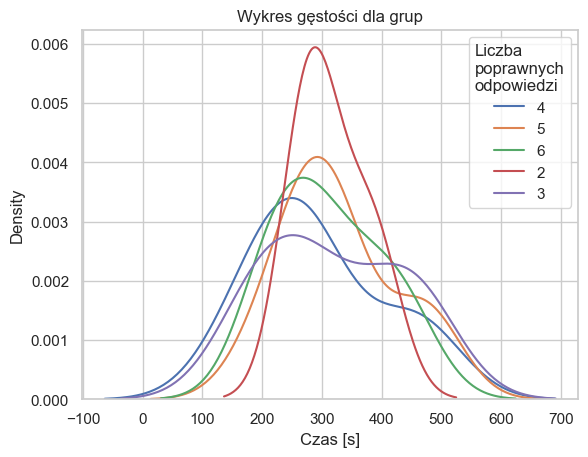

In [26]:
plot_multi_scatter(df_merge, 'Corr_all', 'SumTime_all', 'Liczba poprawnych odpowiedzi', 'Czas [s]')
plot_multi_density(df_merge, 'SumTime_all', 'Corr_all', 'Czas [s]', 'Liczba\npoprawnych\nodpowiedzi')

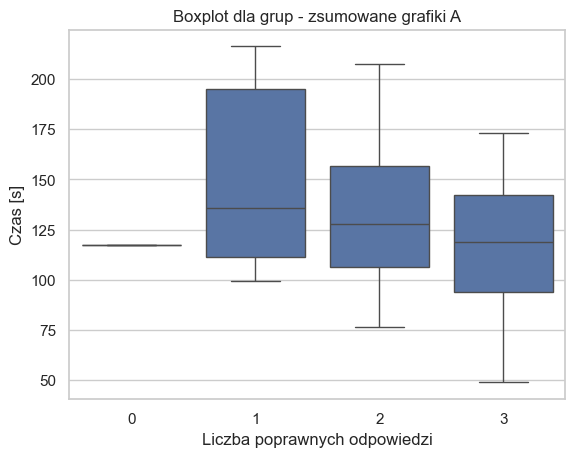

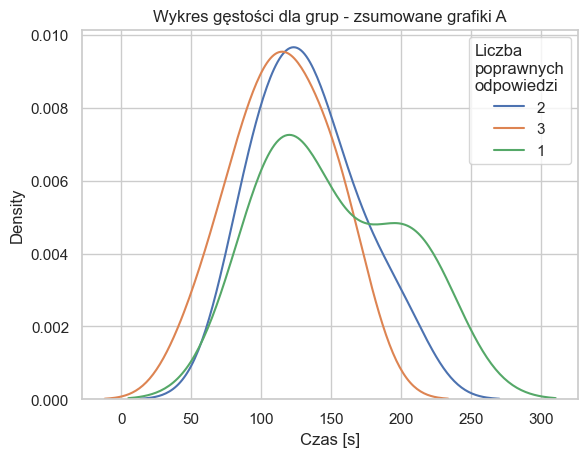

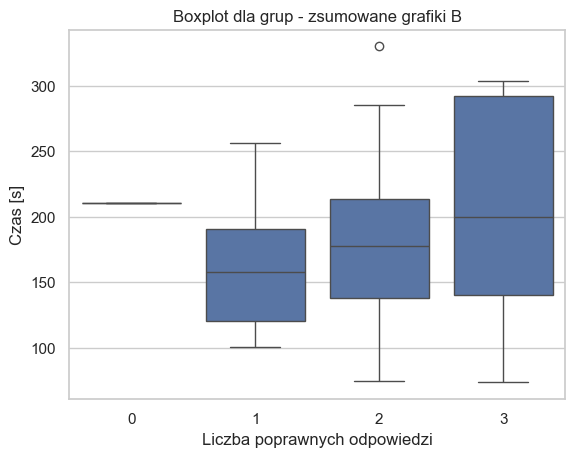

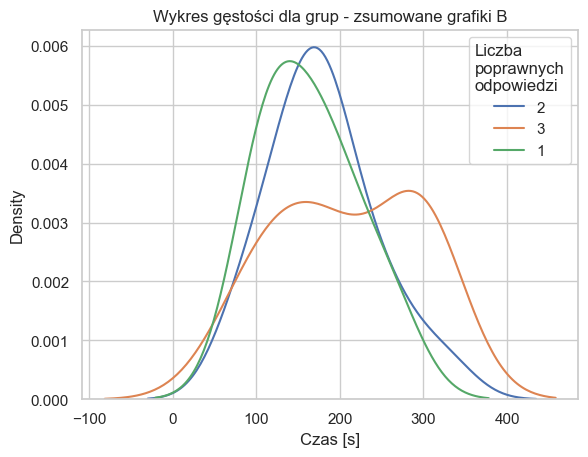

In [27]:
plot_multi_boxplot(df_merge, 'SumCorr_a', 'SumTime_a', 'Liczba poprawnych odpowiedzi', 'Czas [s]', title='Boxplot dla grup - zsumowane grafiki A')
plot_multi_density(df_merge, 'SumTime_a', 'SumCorr_a', 'Czas [s]', 'Liczba\npoprawnych\nodpowiedzi', title='Wykres gęstości dla grup - zsumowane grafiki A', )

plot_multi_boxplot(df_merge, 'SumCorr_b', 'SumTime_b', 'Liczba poprawnych odpowiedzi', 'Czas [s]', title='Boxplot dla grup - zsumowane grafiki B')
plot_multi_density(df_merge, 'SumTime_b', 'SumCorr_b', 'Czas [s]', 'Liczba\npoprawnych\nodpowiedzi', title='Wykres gęstości dla grup - zsumowane grafiki B')

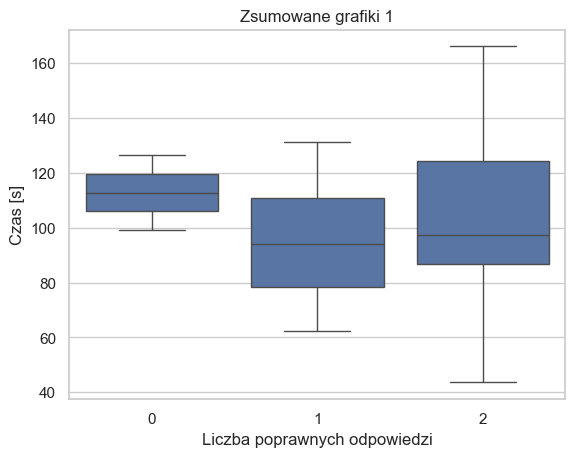

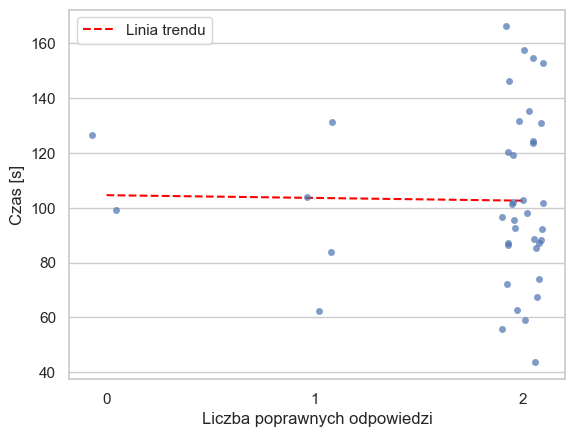

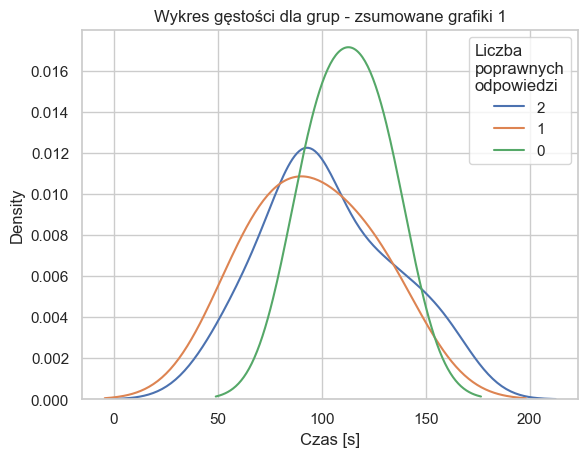

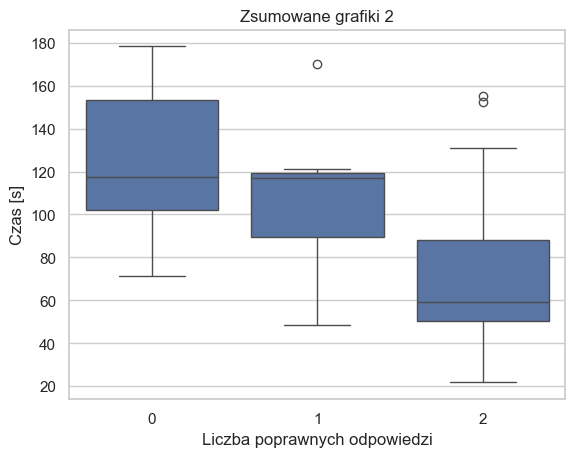

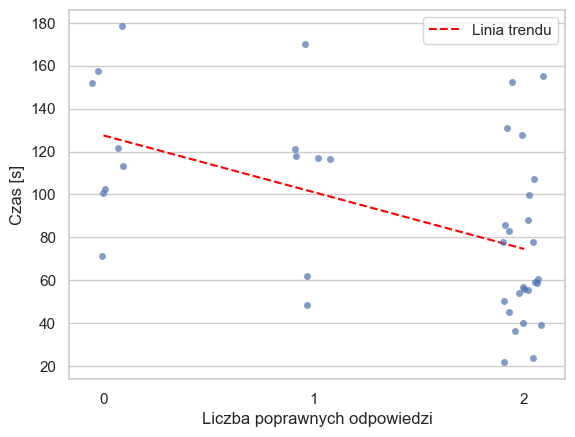

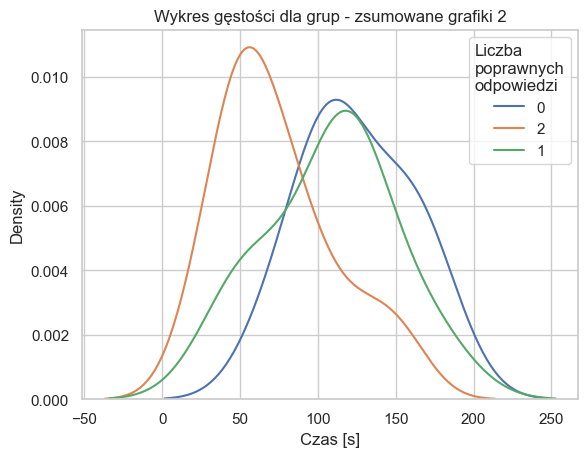

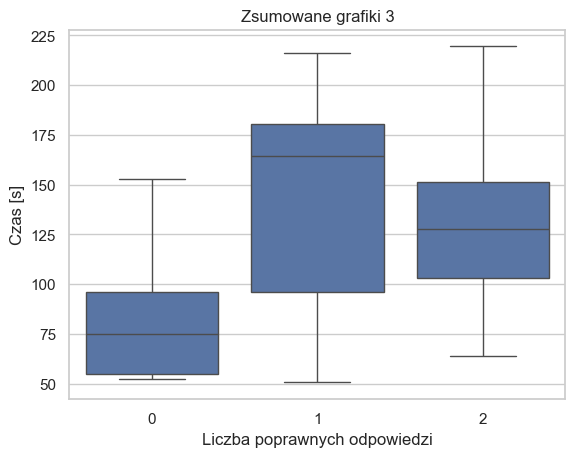

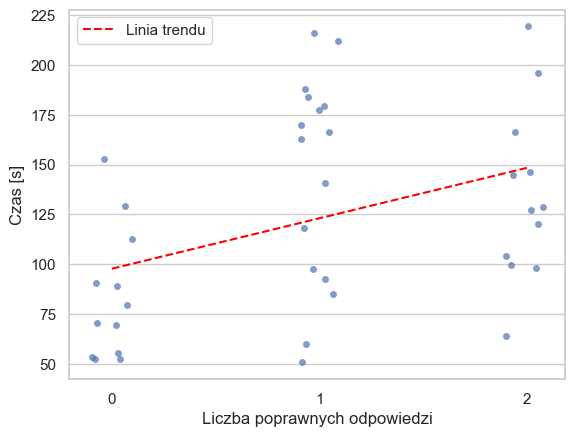

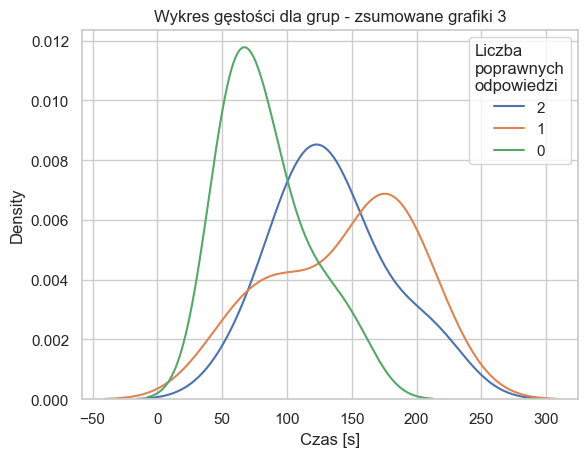

In [28]:
plot_multi_boxplot(df_merge, 'SumCorr_1', 'SumTime_1', 'Liczba poprawnych odpowiedzi', 'Czas [s]', title='Zsumowane grafiki 1')
plot_multi_scatter(df_merge, 'SumCorr_1', 'SumTime_1', 'Liczba poprawnych odpowiedzi', 'Czas [s]', title='')
plot_multi_density(df_merge, 'SumTime_1', 'SumCorr_1', 'Czas [s]', 'Liczba\npoprawnych\nodpowiedzi', title='Wykres gęstości dla grup - zsumowane grafiki 1')

plot_multi_boxplot(df_merge, 'SumCorr_2', 'SumTime_2', 'Liczba poprawnych odpowiedzi', 'Czas [s]', title='Zsumowane grafiki 2')
plot_multi_scatter(df_merge, 'SumCorr_2', 'SumTime_2', 'Liczba poprawnych odpowiedzi', 'Czas [s]', title='')
plot_multi_density(df_merge, 'SumTime_2', 'SumCorr_2', 'Czas [s]', 'Liczba\npoprawnych\nodpowiedzi', title='Wykres gęstości dla grup - zsumowane grafiki 2')

plot_multi_boxplot(df_merge, 'SumCorr_3', 'SumTime_3', 'Liczba poprawnych odpowiedzi', 'Czas [s]', title='Zsumowane grafiki 3')
plot_multi_scatter(df_merge, 'SumCorr_3', 'SumTime_3', 'Liczba poprawnych odpowiedzi', 'Czas [s]', title='')
plot_multi_density(df_merge, 'SumTime_3', 'SumCorr_3', 'Czas [s]', 'Liczba\npoprawnych\nodpowiedzi', title='Wykres gęstości dla grup - zsumowane grafiki 3')

-------------------------------------
1a:


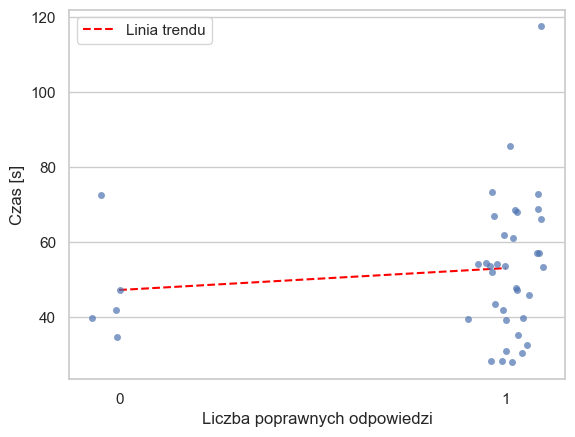

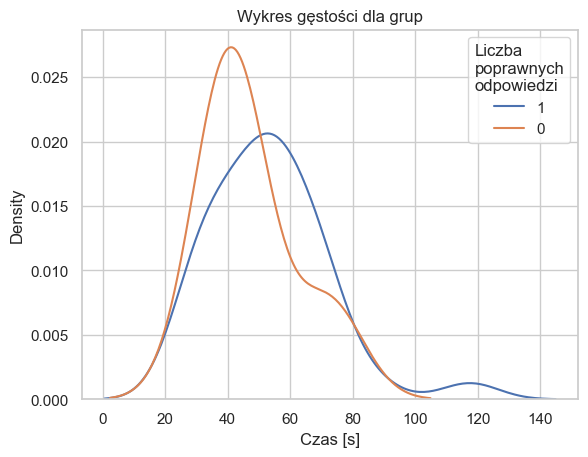

-------------------------------------
1b:


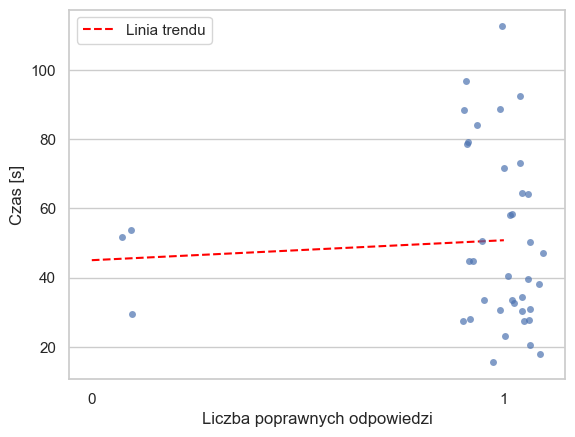

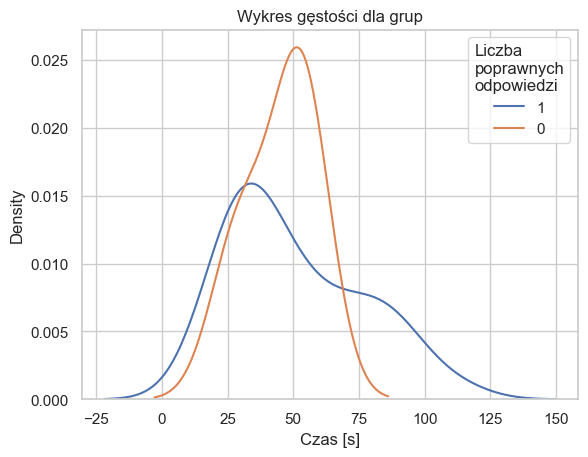

-------------------------------------
2a:


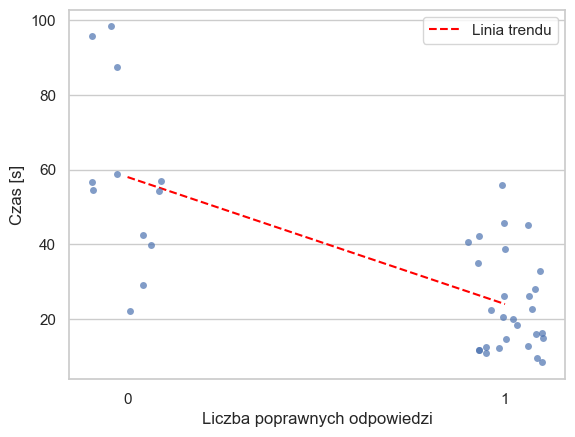

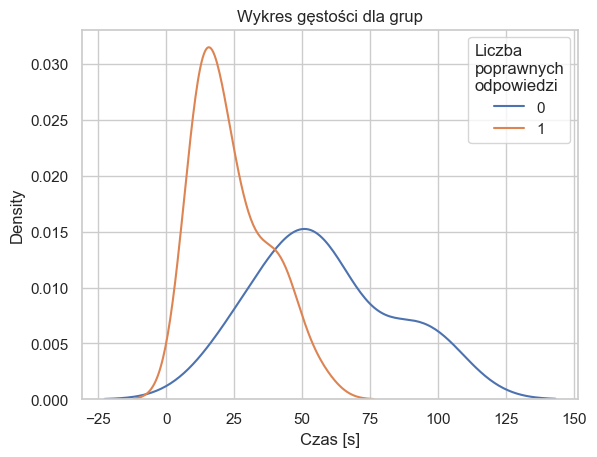

-------------------------------------
2b:


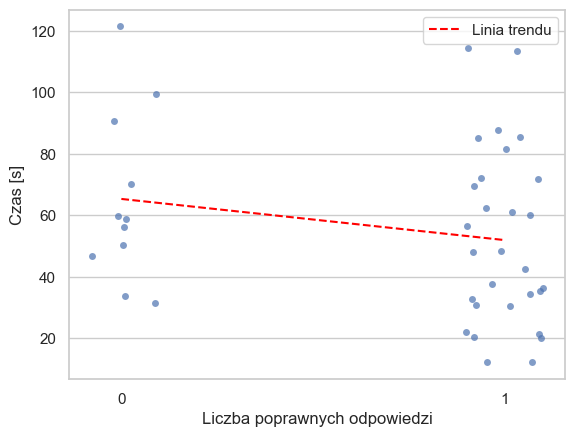

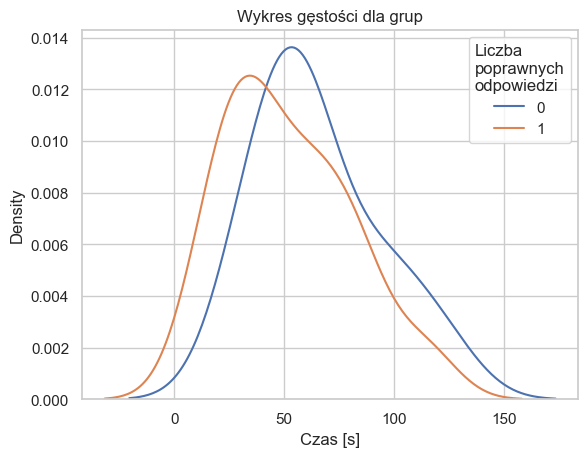

-------------------------------------
3a:


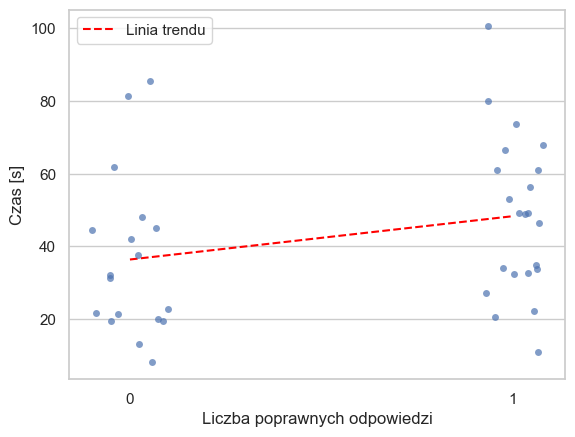

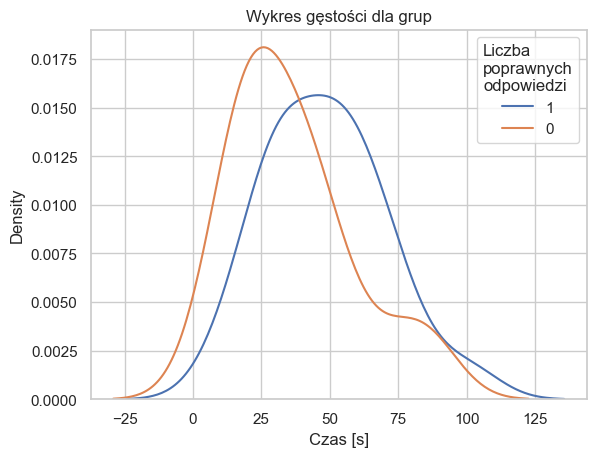

-------------------------------------
3b:


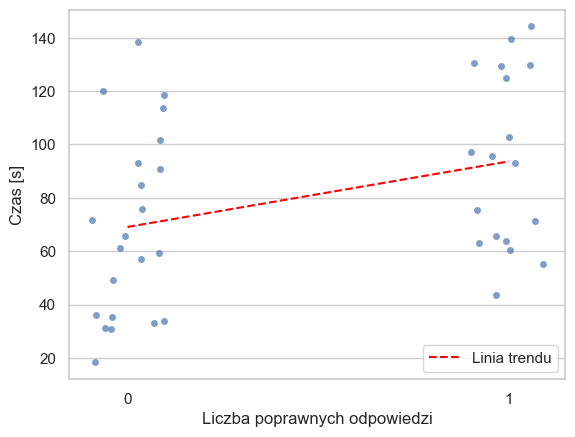

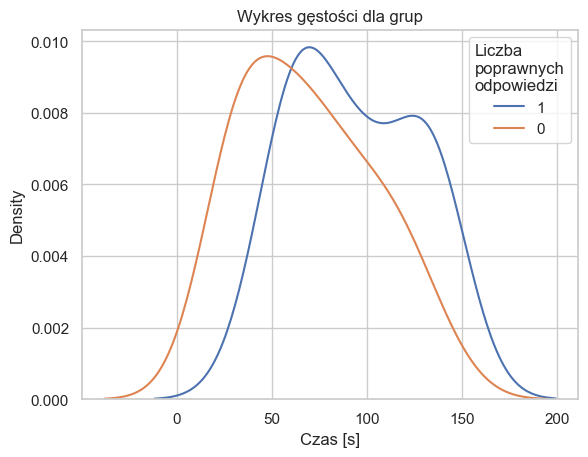

In [29]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i+1])
    plot_multi_scatter(df, 'correctness', 'time', 'Liczba poprawnych odpowiedzi', 'Czas [s]', title='')
    plot_multi_density(df, 'time', 'correctness', 'Czas [s]', 'Liczba\npoprawnych\nodpowiedzi', title='Wykres gęstości dla grup')